In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

## Load the data

In [2]:
# Load the movie metadata
movie_metadata = pd.read_csv('/Users/nhatanhdao/Documents/EPFL/MA1/ada/Project/MovieSummaries/movie.metadata.tsv', sep='\t')
movie_metadata.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']

# Load the character metadata
character_metadata = pd.read_csv('/Users/nhatanhdao/Documents/EPFL/MA1/ada/Project/MovieSummaries/character.metadata.tsv', sep='\t')
character_metadata.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender', 'Actor height (in meters)', 
                              'Actor ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']

# Load the tv tropes data
tv_tropes = pd.read_csv('/Users/nhatanhdao/Documents/EPFL/MA1/ada/Project/MovieSummaries/tvtropes.clusters.txt', sep='\t')
tv_tropes.columns = ['Character trope', 'Movie information']

## Character tropes exploration

In [4]:
# Count the number of occurences for each character trope
tropes_count = tv_tropes['Character trope'].value_counts()
tropes_count = pd.DataFrame(tropes_count)
tropes_count.head()

,count
Character trope,
crazy_jealous_guy,25
corrupt_corporate_executive,23
byronic_hero,17
psycho_for_hire,16
father_to_his_men,15


/var/folders/13/nhns1byn0y74c0cfvxpvxz3m0000gn/T/ipykernel_24288/3904329598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tropes.loc['Other'] = other_tropes_sum


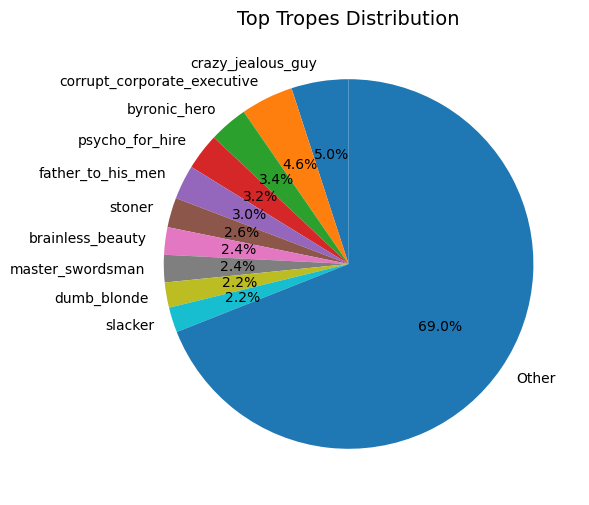

In [5]:
# Sort data and get top 10 categories summing the rest as 'Other'
top_tropes_count = tropes_count.sort_values(by='count', ascending=False)
top_tropes = top_tropes_count.head(10)
other_tropes_sum = top_tropes_count.iloc[10:].sum()
top_tropes.loc['Other'] = other_tropes_sum

# Plot figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(top_tropes['count'], labels=top_tropes.index, autopct='%1.1f%%', startangle=90)
ax.set_title("Top Tropes Distribution", fontsize=14)

plt.show()


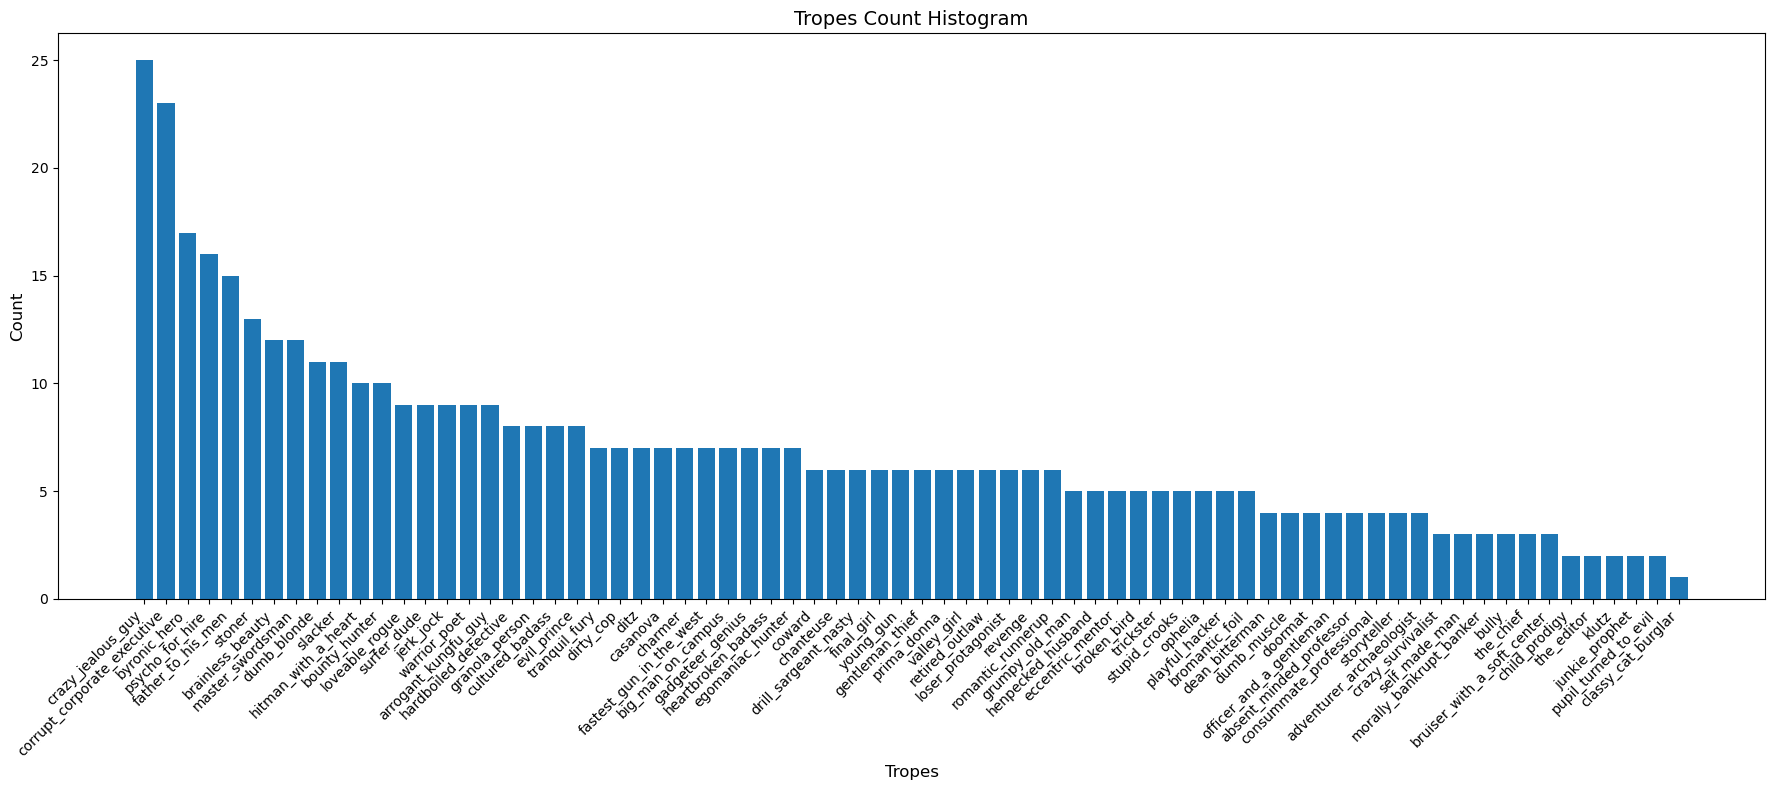

In [6]:
# Plot a histogram
plt.figure(figsize=(18, 8)) 

# Sort the data
tropes_count_sorted = tropes_count.sort_values(by='count', ascending=False)

plt.bar(tropes_count_sorted.index, tropes_count_sorted['count'])

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Tropes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Tropes Count Histogram", fontsize=14)

plt.tight_layout()
plt.show()


## Tropes distribution by time period

In [7]:
# Get the movie year for each recorded character
tropes_by_year = pd.DataFrame(tv_tropes['Character trope'])
movie_dates = []
for movie_info in tv_tropes['Movie information']: # Get the movie release date for each character
    movie_info = ast.literal_eval(movie_info)
    character_id = movie_info['id']
    if character_metadata[character_metadata['Freebase character/actor map ID'] == character_id].empty:
        movie_date = None
    else:
        movie_date = character_metadata[character_metadata['Freebase character/actor map ID'] == character_id]['Movie release date'].values[0]
    movie_dates.append(movie_date)
tropes_by_year.insert(1, "Movie release date", movie_dates)
# Only keep the year
tropes_by_year['Movie release year'] = [int(str(date)[:4]) if date is not None else None for date in tropes_by_year['Movie release date']]
tropes_by_year.head()

,Character trope,Movie release date,Movie release year
0,absent_minded_professor,1994-12-21,1994
1,absent_minded_professor,1994-07-01,1994
2,absent_minded_professor,1954-06-16,1954
3,absent_minded_professor,1994-10-28,1994
4,adventurer_archaeologist,2008-05-22,2008


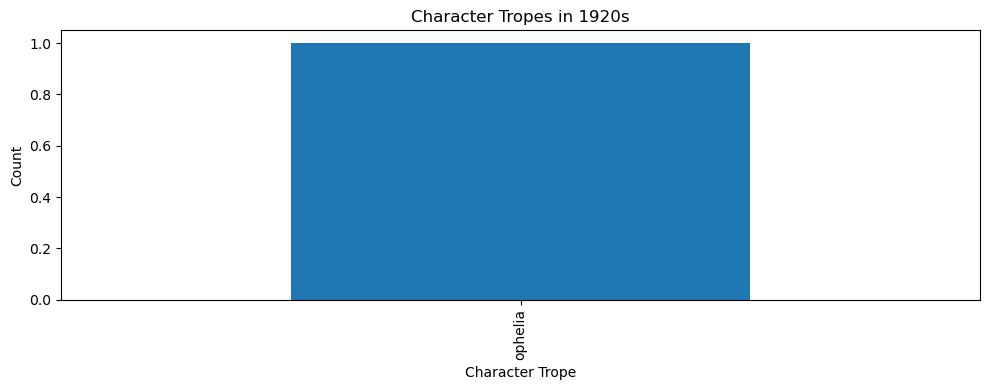

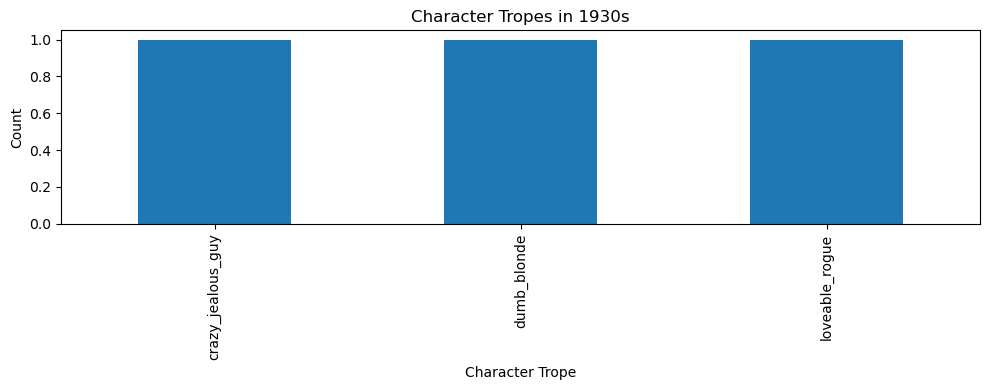

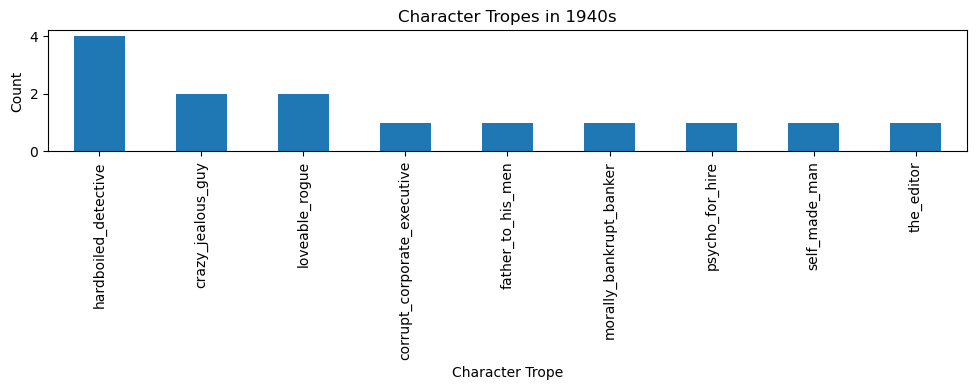

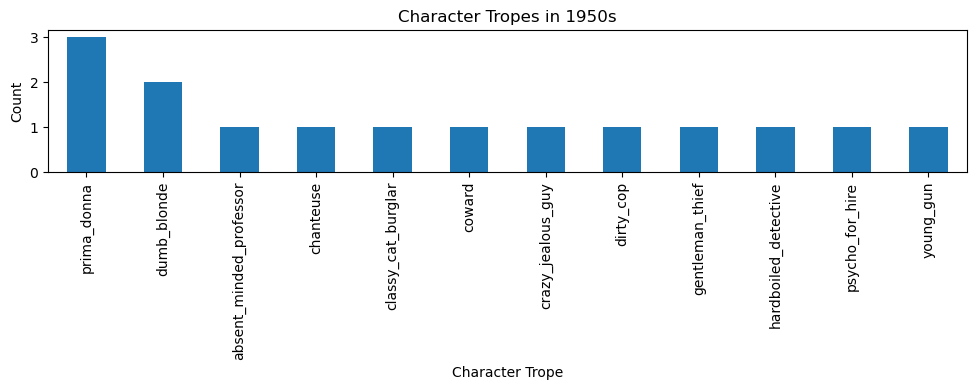

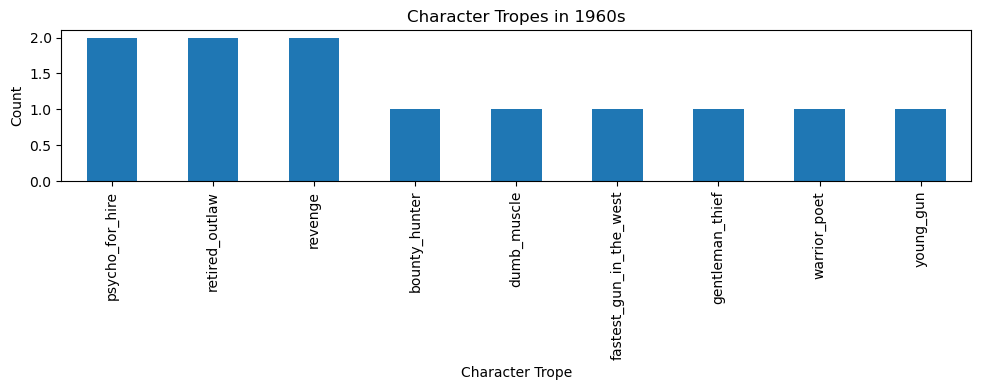

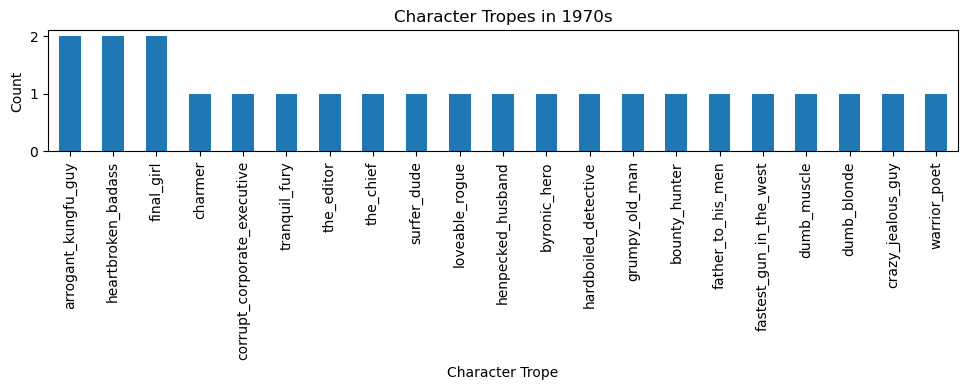

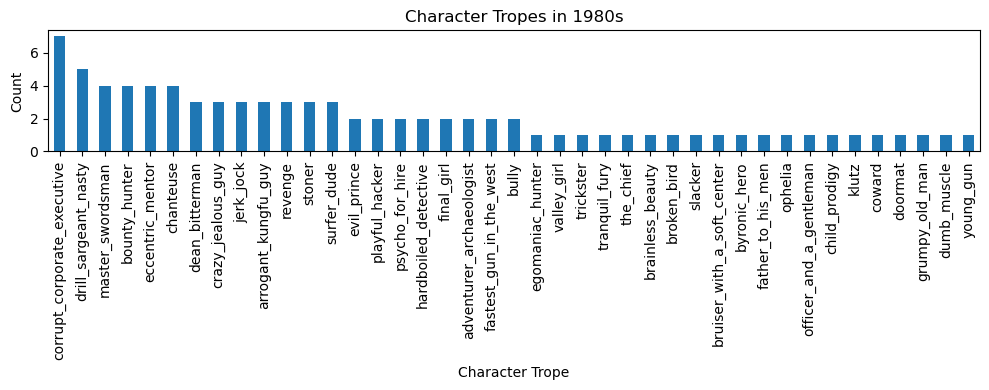

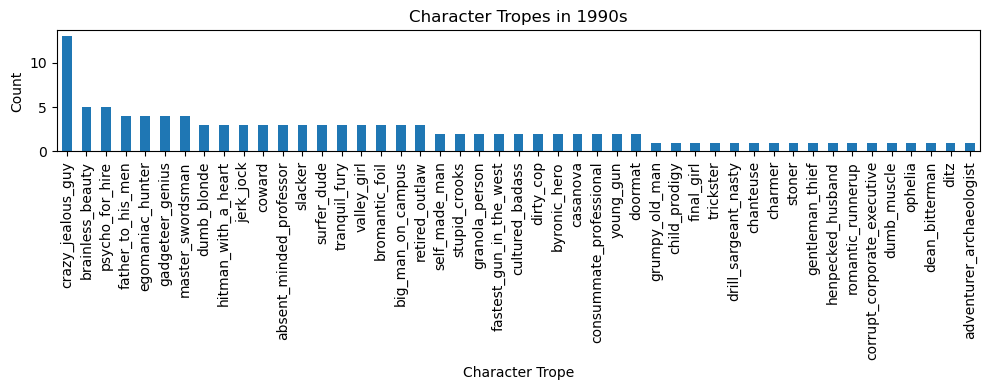

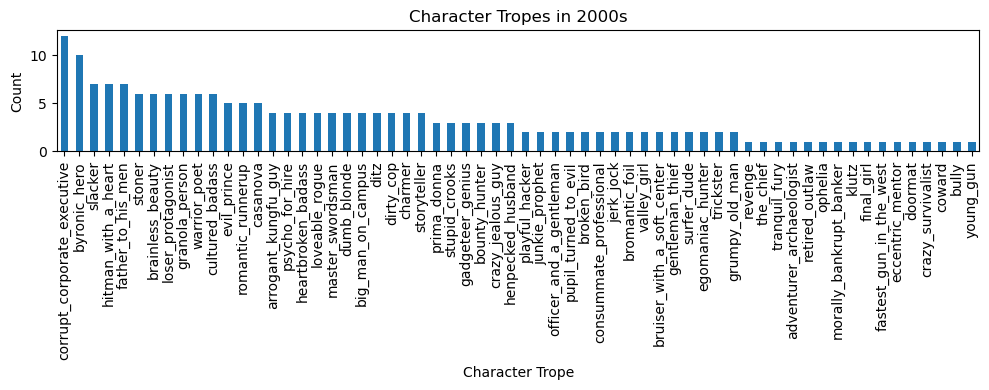

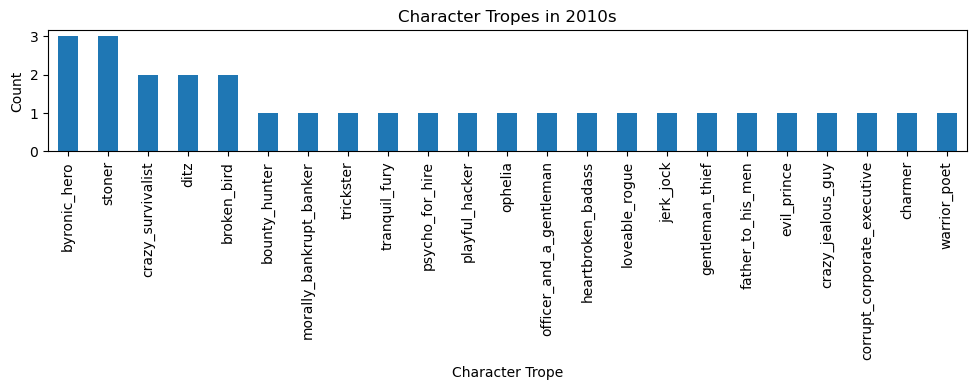

In [55]:
# Divide by decade
tropes_by_year['Decade'] = (tropes_by_year['Movie release year'] // 10) * 10

decade_trope_counts = tropes_by_year.groupby(['Decade', 'Character trope']).size().unstack(fill_value=0)

# Plot a histogram per decade
for decade in decade_trope_counts.index:
    trope_counts = decade_trope_counts.loc[decade][decade_trope_counts.loc[decade] > 0].sort_values(ascending=False) 
    
    plt.figure(figsize=(10, 4))
    trope_counts.plot(kind='bar')
    
    plt.title(f'Character Tropes in {decade}s')
    plt.xlabel('Character Trope')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

## Tropes by gender

In [8]:
# Get the actor gender for each recorded character 
tropes_by_gender = pd.DataFrame(tv_tropes['Character trope'])
actors_gender = []
for movie_info in tv_tropes['Movie information']:
    movie_info = ast.literal_eval(movie_info)
    character_id = movie_info['id']
    if character_metadata[character_metadata['Freebase character/actor map ID'] == character_id].empty:
        gender = None
    else:
        gender = character_metadata[character_metadata['Freebase character/actor map ID'] == character_id]['Actor gender'].values[0]
    actors_gender.append(gender)
    
tropes_by_gender.insert(1, "Actor gender", actors_gender)

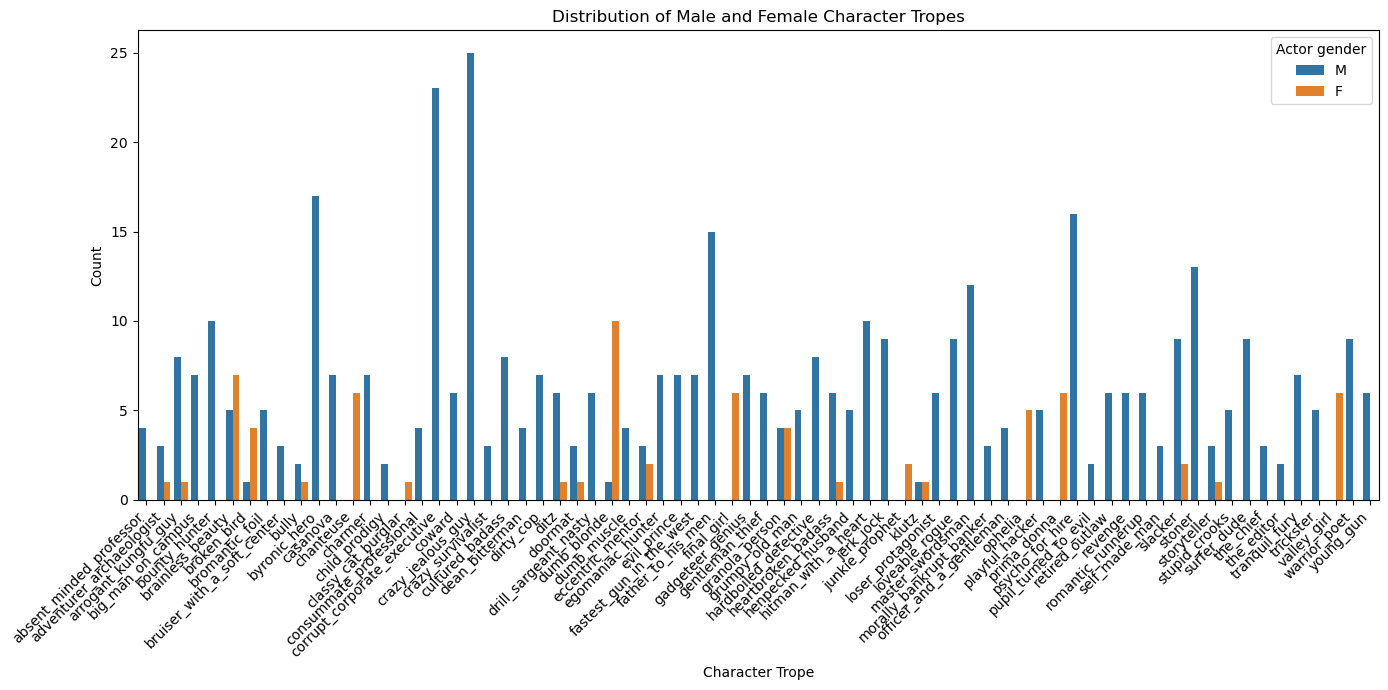

In [9]:
# Count the number of F and M for each trope
trope_counts = tropes_by_gender.groupby(['Character trope', 'Actor gender']).size().reset_index(name='Count')

# Plot a histogram comparing the two
plt.figure(figsize=(14, 7))
sns.barplot(x='Character trope', y='Count', hue='Actor gender', data=trope_counts)

plt.title('Distribution of Male and Female Character Tropes')
plt.xlabel('Character Trope')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Tropes by genre

In [11]:
# Get the movie genre for each recorded character 
tropes_by_genre = pd.DataFrame(tv_tropes['Character trope'])
movie_genre = []
for movie_info in tv_tropes['Movie information']:
    movie_info = ast.literal_eval(movie_info)
    movie_name = movie_info['movie']
    if movie_metadata[movie_metadata['Movie name'] == movie_name].empty:
        gender = None
    else:
        genre = movie_metadata[movie_metadata['Movie name'] == movie_name]['Movie genres'].values[0]
    movie_genre.append(genre)
    
tropes_by_genre.insert(1, "Movie genres", movie_genre)

In [12]:
def clean_genre(genre_string):
        if pd.isna(genre_string):
            return []
        # Remove common special characters and split on commas
        cleaned = (genre_string.replace('{', '')
                             .replace('}', '')
                             .replace('"', ''))
        genres = [g.split(':')[-1].strip() for g in cleaned.split(',')]
        # Remove empty strings and duplicates
        return list(set(genre for genre in genres if genre))
    
# Apply genre cleaning
tropes_by_genre['Movie genres'] = tropes_by_genre['Movie genres'].apply(clean_genre)
tropes_by_genre.head()

,Character trope,Movie genres
0,absent_minded_professor,"[Adventure Comedy, Comedy, Family Film]"
1,absent_minded_professor,"[Black-and-white, Adventure]"
2,absent_minded_professor,"[Horror, Monster, Science Fiction, Sci-Fi Horr..."
3,absent_minded_professor,"[Action, Thriller, Science Fiction, Adventure,..."
4,adventurer_archaeologist,"[Action, Adventure Comedy, Costume Adventure, ..."


/var/folders/13/nhns1byn0y74c0cfvxpvxz3m0000gn/T/ipykernel_6082/26372549.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_tropes_per_genre = trope_genre_counts.groupby('Movie genres').apply(


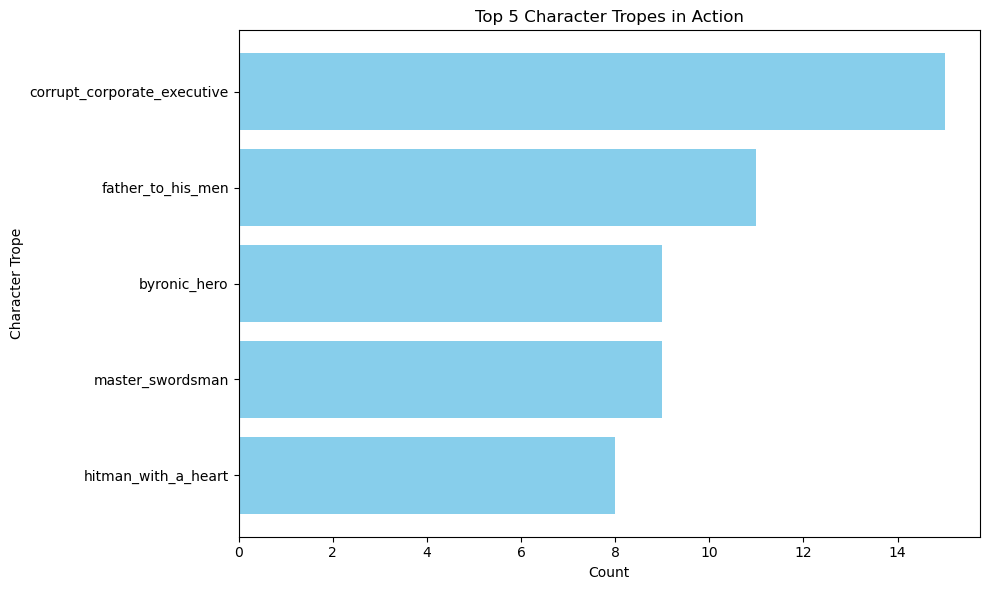

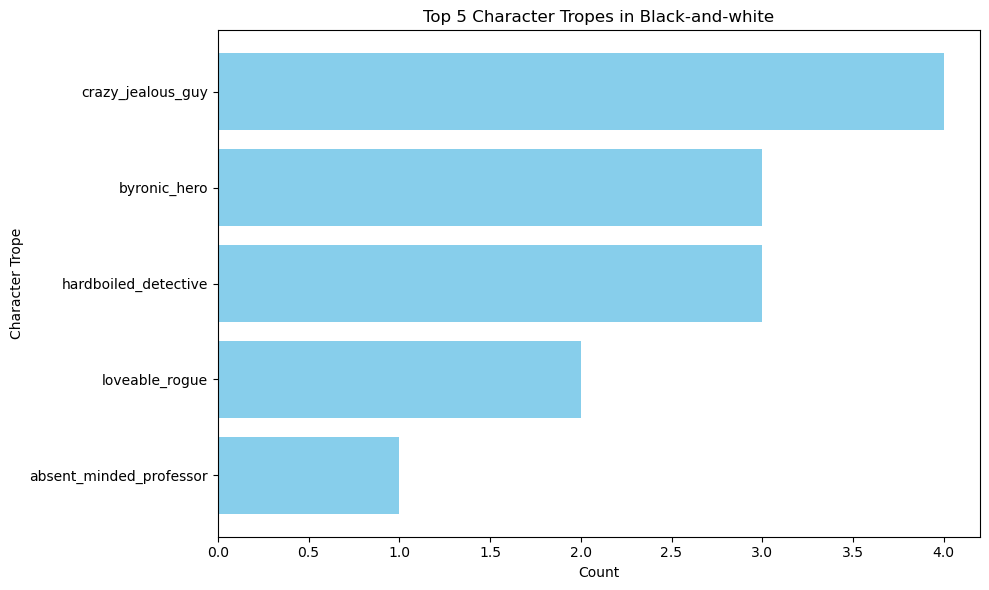

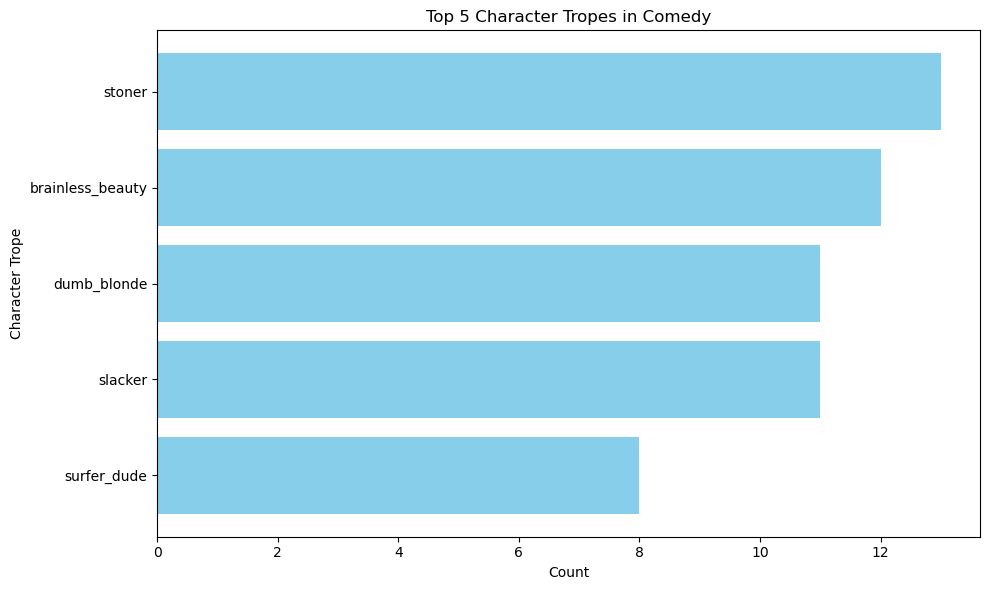

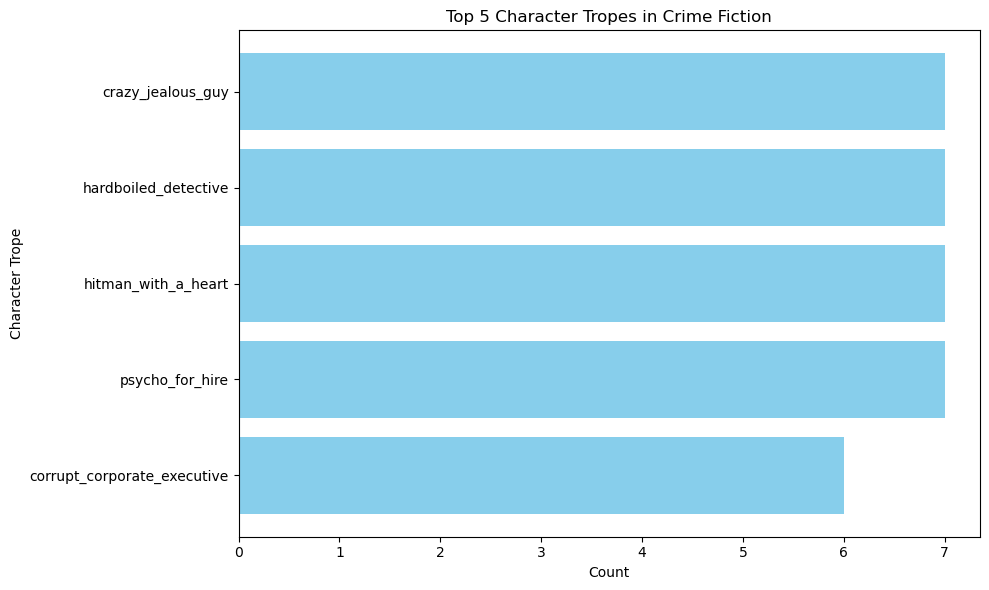

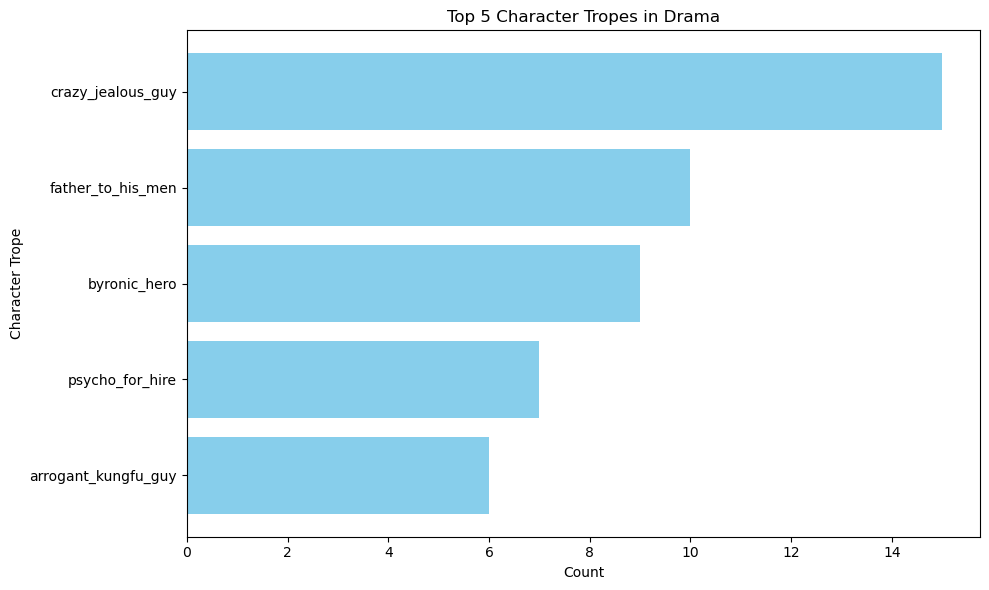

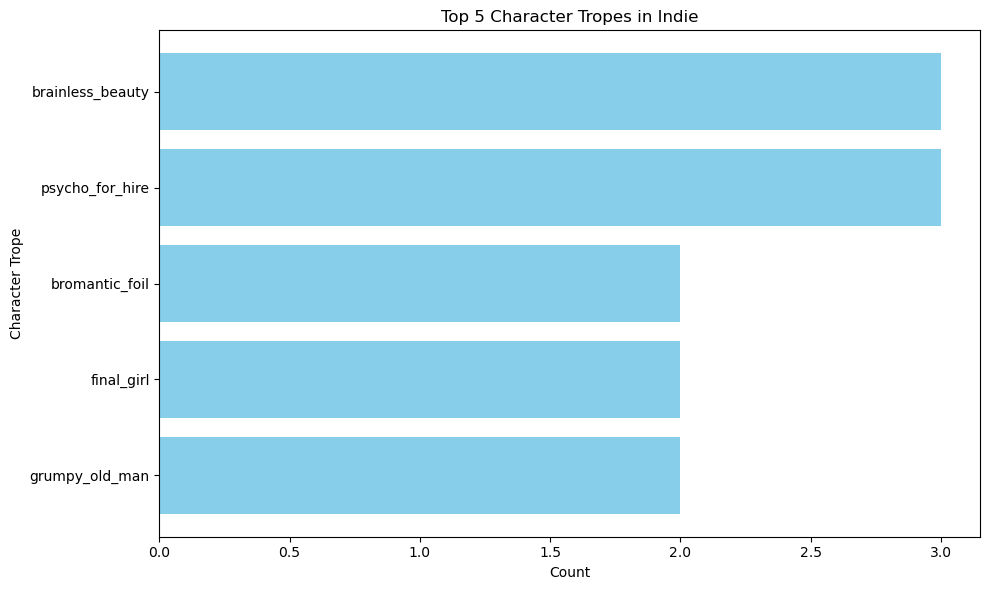

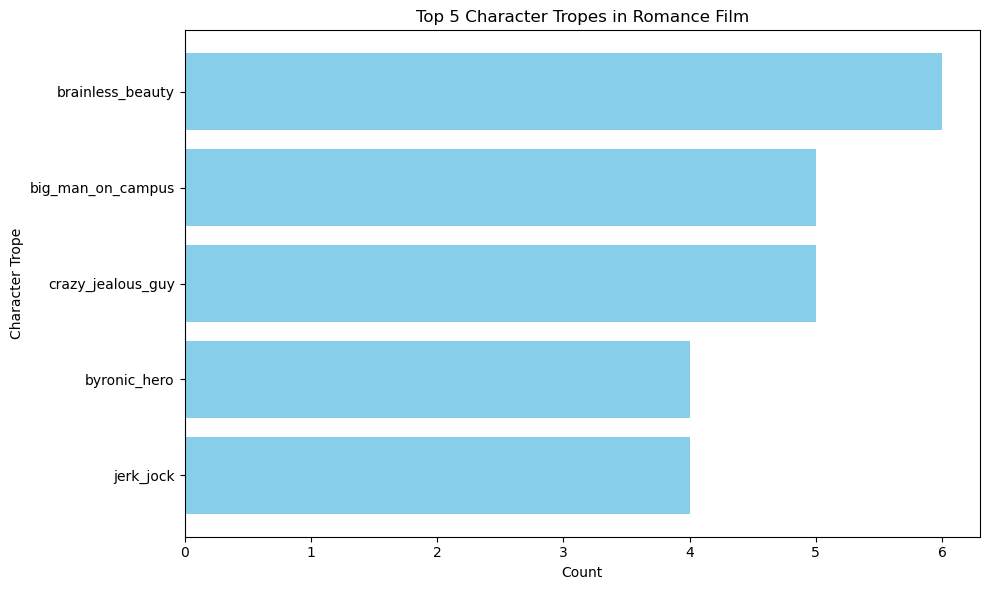

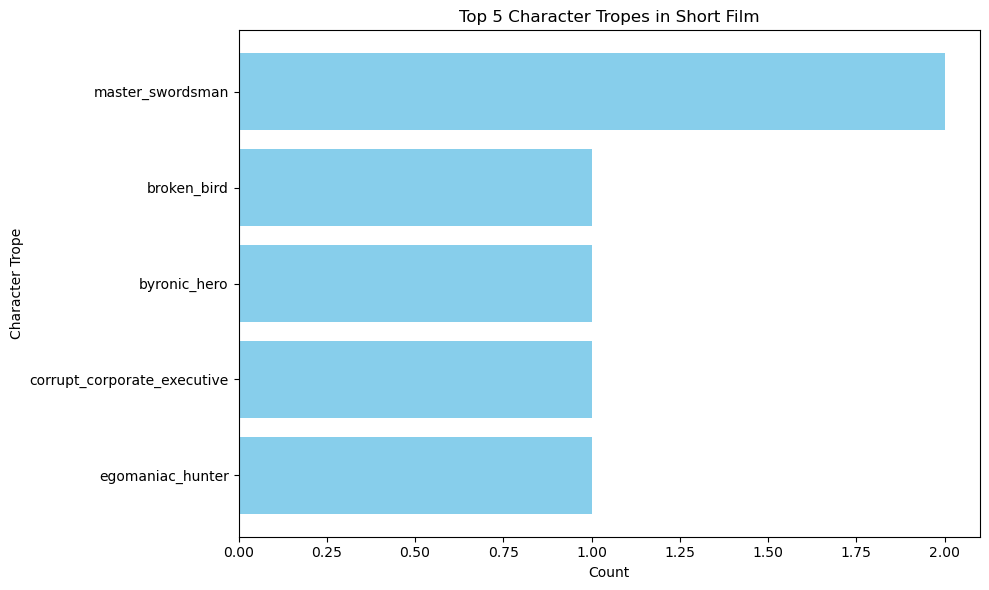

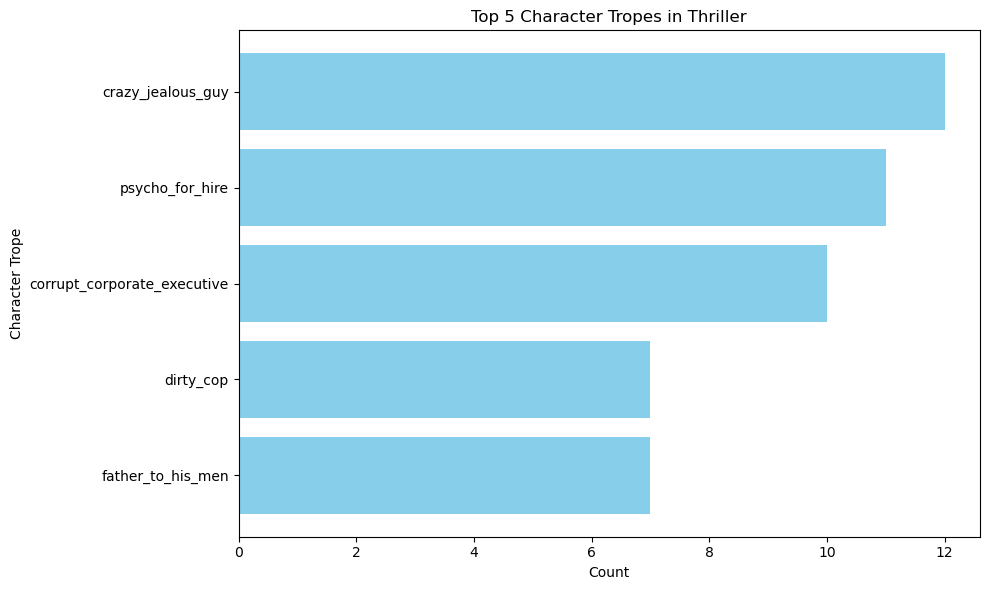

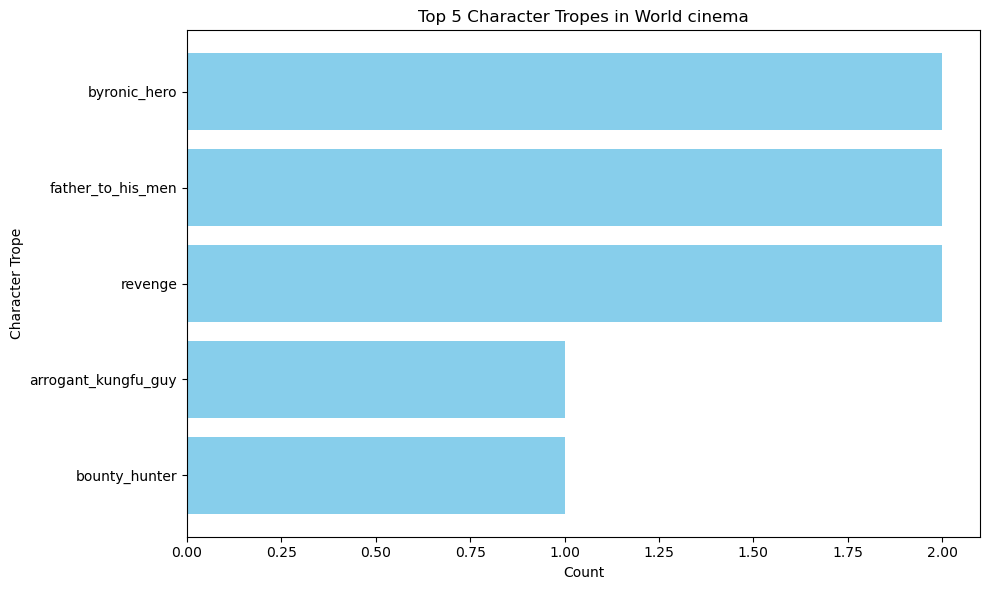

In [18]:
# Exploding the genre list to have one genre per row
tropes_by_genre_exploded = tropes_by_genre.explode('Movie genres')

# Only keep the top 10 genres
genres_of_interest = ['Drama', 'Comedy', 'Romance Film', 'Black-and-white', 
                      'Action', 'Thriller', 'Short Film', 'World cinema', 
                      'Crime Fiction', 'Indie']

# Filter the DataFrame to include only the specified genres
filtered_tropes_by_genre = tropes_by_genre_exploded[tropes_by_genre_exploded['Movie genres'].isin(genres_of_interest)]

# Count the occurrences of each trope within each genre
trope_genre_counts = filtered_tropes_by_genre.groupby(['Movie genres', 'Character trope']).size().reset_index(name='count')

# Filter to get the top 5 tropes for each genre
top_10_tropes_per_genre = trope_genre_counts.groupby('Movie genres').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

# Plotting each genre with its top 5 tropes
unique_genres = top_10_tropes_per_genre['Movie genres'].unique()
for genre in unique_genres:
    genre_data = top_10_tropes_per_genre[top_10_tropes_per_genre['Movie genres'] == genre]
    
    plt.figure(figsize=(10, 6))
    plt.barh(genre_data['Character trope'], genre_data['count'], color='skyblue')
    plt.title(f'Top 5 Character Tropes in {genre}')
    plt.xlabel('Count')
    plt.ylabel('Character Trope')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()